## Neural Network for image processing - MNIST

Focus points: Data Analysis - Explainability - Performance 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import plot_model
import math
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [33]:
%load_ext watermark

%watermark -v -m -p numpy,tensorflow,pandas,seaborn,matplotlib

print(" ")
%watermark -u -b -t -z

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

numpy     : 1.23.5
tensorflow: 2.11.0
pandas    : 1.4.4
seaborn   : 0.11.2
matplotlib: 3.5.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: 15:05:48Mitteleuropäische Zeit

Git branch: 



x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of the first 25 samples in the MNIST training set


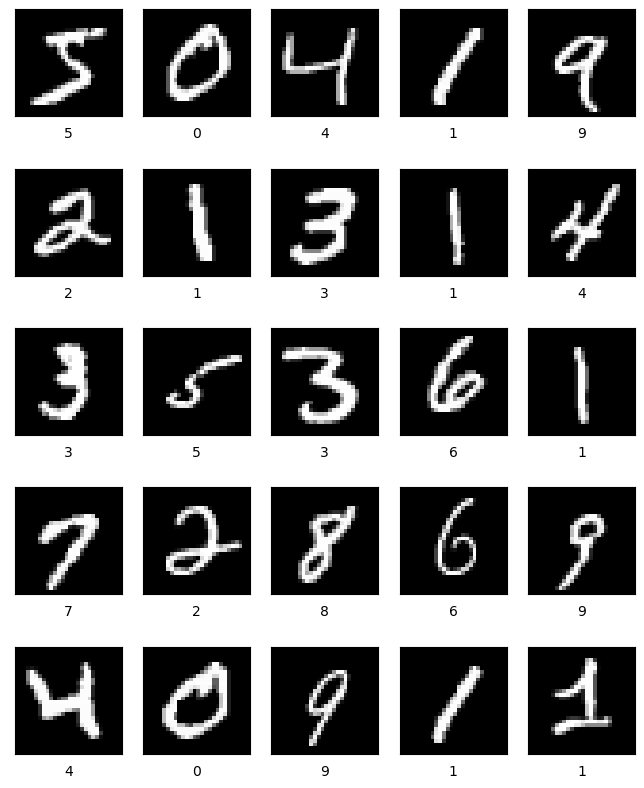

In [31]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(8,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [3]:
# #normalizing the input data
x_train_normalized = x_train/255 
x_test_normalized = x_test/255 

# Normalize input images (comply with activation function)
# x_train, x_validation = x_train / 255.0, x_validation / 255.0

#x_train= x_train_normalized.reshape(-1, 28, 28, 1)
#x_test = x_test_normalized.reshape(-1, 28, 28, 1)

Building four models to compare them in the following:

In [4]:
#Building the first model with only dense layers and a flatten layer as the first layer:
model1 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10),
])

#Building the second model with an additional dropout layer:
model2 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10),
])

#Building two similar models, but this time with other activation functions (softmax & sigmoid):
model3 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dense(10),
])

model4 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(10),
])

In [26]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400,906
Trainable params: 400,906
Non-trai

In [ ]:
model2.summary()

In [ ]:
model3.summary()

In [ ]:
model4.summary()

Defining the loss:

In [27]:
model_list = [model1, model2, model3, model4]
model_history = [0, 0, 0, 0]
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#Defining the loss when starting the neural network from zero, as its output should be random with a propabilty close to 1/10
# print(-tf.math.log(1/10))

# sampleID = 100
# loss_fn(y_train[:1], model1(x_train[sampleID-1:sampleID]).numpy()).numpy()

Compiling all previous models with the calculated loss and the 'adam' optimizer:

In [6]:
for i in range(4):
    model_list[i].compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

Determining the training parameters for the models. It will be the same for everyone to have fair conditions for comparison

In [7]:
import datetime
import os
%reload_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

for i in range(4):
    print("model" + str(i+1) + ':')
    model_history[i] = model_list[i].fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback])
    print('\n')

model1:
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2130 - accuracy: 0.9357 - val_loss: 0.1139 - val_accuracy: 0.9648
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1012 - accuracy: 0.9697 - val_loss: 0.1047 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0997 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0589 - accuracy: 0.9823 - val_loss: 0.0874 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0988 - val_accuracy: 0.9745
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0811 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0361 - accuracy: 0.9894 - val_loss: 0.0801 

In [ ]:
# This line starts up tensorboard for you
%tensorboard --logdir logs

Saving the models configurations

In [8]:
for i in range(4):
    safe_name = 'model' + str(i+1)
    model_list[i].save(safe_name, save_format='h5')

In [9]:
# Reloading weights of previously trained models from saved files (only necessary when restarting the kernel):
model1 = tf.keras.models.load_model('model1')
model2 = tf.keras.models.load_model('model2')
model3 = tf.keras.models.load_model('model3')
model4 = tf.keras.models.load_model('model4')

In [10]:
# Having the models predict the test dataset for later evaluation:
predictions_1 = model1.predict([x_test])
predictions_1 = np.argmax(predictions_1, axis=1)

predictions_2 = model2.predict([x_test])
predictions_2 = np.argmax(predictions_2, axis=1)

predictions_3 = model3.predict([x_test])
predictions_3 = np.argmax(predictions_3, axis=1)

predictions_4 = model4.predict([x_test])
predictions_4 = np.argmax(predictions_4, axis=1)

313/313 [==============================] - 1s 4ms/step


The following cells print a visualisation of the errors made by the models.
It's not necessary to run and inspect them, but still a nice gadget.

In [ ]:
# Plotting a visualisation of the first model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_1[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
# Plotting a visualisation of the second model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_2[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
# Plotting a visualisation of the third model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_3[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
# Plotting a visualisation of the fourth model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_4[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Plotting the heatmap for each model for a better understanding of where the model's weakpoints are:

model1 heatmap:


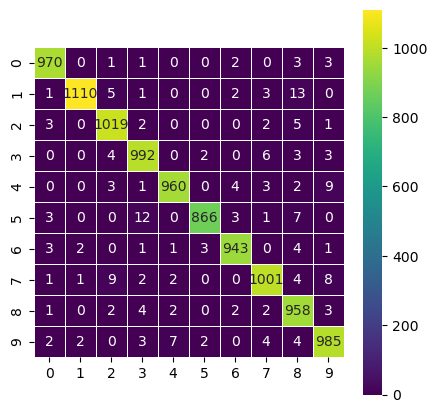

model2 heatmap:


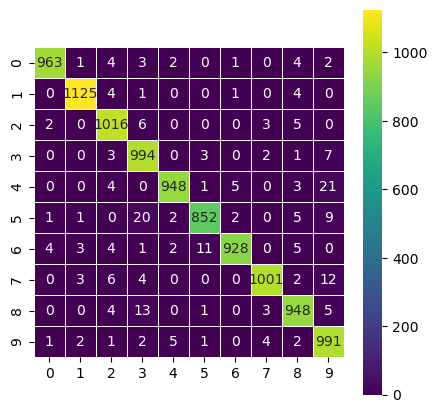

model3 heatmap:


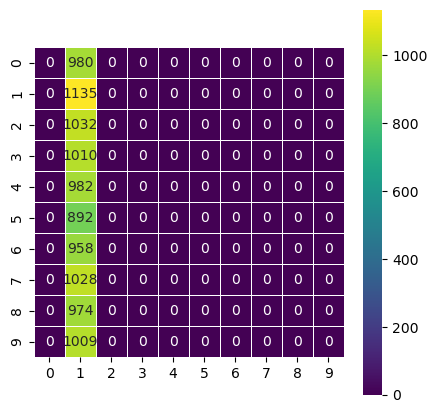

model4 heatmap:


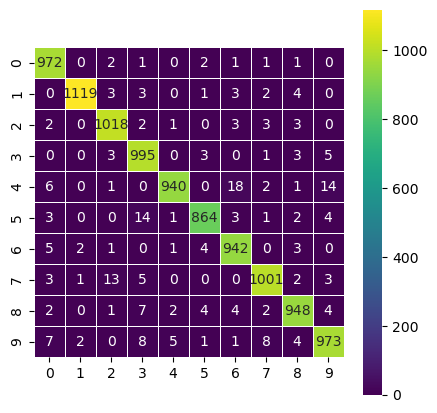

In [11]:
for i in range(4):
    predictions_list = [predictions_1, predictions_2, predictions_3, predictions_4]
    confusion_matrix = tf.math.confusion_matrix(y_test, predictions_list[i])

    f, ax = plt.subplots(figsize=(5, 5))
    sn.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.7,
        fmt="d",
        square=True,
        ax=ax,
        cmap="viridis",
    )
    print('model'+ str(i+1) + ' heatmap:')
    plt.show()

What catches the eye is that model3 predicts every number as a one. If you think about it, this makes a lot of sense when you look into what the softmax activation function realy does. It scales all values in a way, that the sum of every value equals a one.

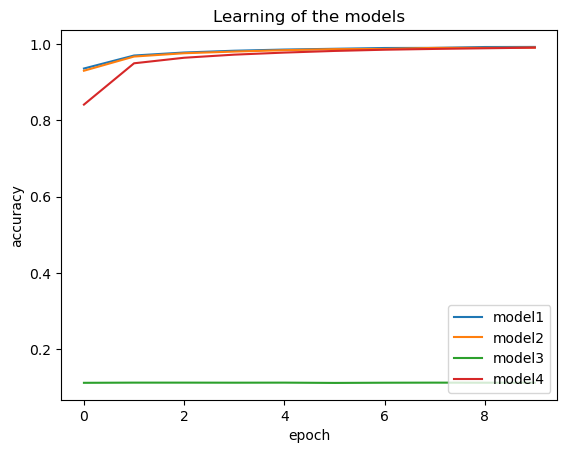

In [12]:
plt.plot(model_history[0].history['accuracy'])
plt.plot(model_history[1].history['accuracy'])
plt.plot(model_history[2].history['accuracy'])
plt.plot(model_history[3].history['accuracy'])

plt.title('Learning of the models')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='lower right')
plt.show()

In [13]:
batch_size=64
loss1, acc1 = model1.evaluate(x_test, y_test, batch_size=batch_size)
loss2, acc2 = model2.evaluate(x_test, y_test, batch_size=batch_size)
loss3, acc3 = model3.evaluate(x_test, y_test, batch_size=batch_size)
loss4, acc4 = model4.evaluate(x_test, y_test, batch_size=batch_size)

print("\n model1 accuracy: %.1f%%" % (100.0 * acc1))
print("\n model2 accuracy: %.1f%%" % (100.0 * acc2))
print("\n model3 accuracy: %.1f%%" % (100.0 * acc3))
print("\n model4 accuracy: %.1f%%" % (100.0 * acc4))

157/157 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9772

 model1 accuracy: 98.0%

 model2 accuracy: 97.7%

 model3 accuracy: 11.3%

 model4 accuracy: 97.7%


Except for the third model, all models seem to have a very similar accuracy. The dropout layer in the second and third model prevent the overfitting of a model, when trainied with more epochs. The relu activation function fits well for the MNIST dataset, as the negative activation of a neuron is not necessary for this approach. Sigmoid activation function fits well for numerous neural networks.

In the following, the second model will be analyzed under the influence of a change in epochs and learning rates

3 epochs with learning rate=0.01
Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4548 - accuracy: 0.8891 - val_loss: 0.2500 - val_accuracy: 0.9392
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3060 - accuracy: 0.9311 - val_loss: 0.2306 - val_accuracy: 0.9484
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2905 - accuracy: 0.9311 - val_loss: 0.3219 - val_accuracy: 0.9383


3 epochs with learning rate=0.005
Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3188 - accuracy: 0.9136 - val_loss: 0.2192 - val_accuracy: 0.9415
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1846 - accuracy: 0.9542 - val_loss: 0.2011 - val_accuracy: 0.9479
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1696 - accuracy: 0.9593 - val_loss: 0.1402 - val_accuracy: 0.9640


3 epochs with learning rate=0.0001
Epoch 1/3
1875/1875 [===========

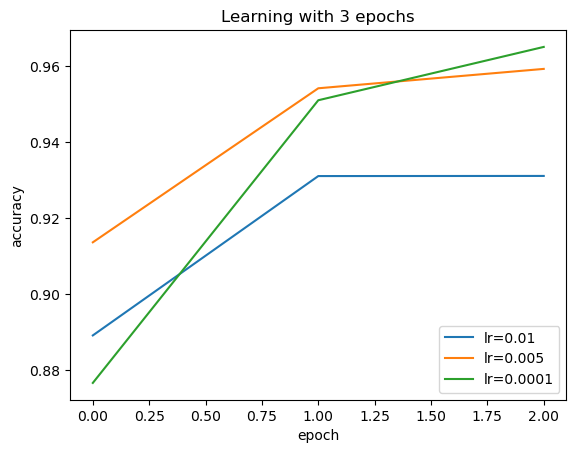

5 epochs with learning rate=0.01
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4528 - accuracy: 0.8857 - val_loss: 0.3205 - val_accuracy: 0.9183
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3259 - accuracy: 0.9252 - val_loss: 0.3293 - val_accuracy: 0.9229
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2603 - accuracy: 0.9408 - val_loss: 0.2845 - val_accuracy: 0.9449
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2957 - accuracy: 0.9355 - val_loss: 0.2256 - val_accuracy: 0.9493
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2872 - accuracy: 0.9363 - val_loss: 0.2638 - val_accuracy: 0.9388


5 epochs with learning rate=0.005
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3255 - accuracy: 0.9122 - val_loss: 0.2269 - val_accuracy: 0.9431
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step -

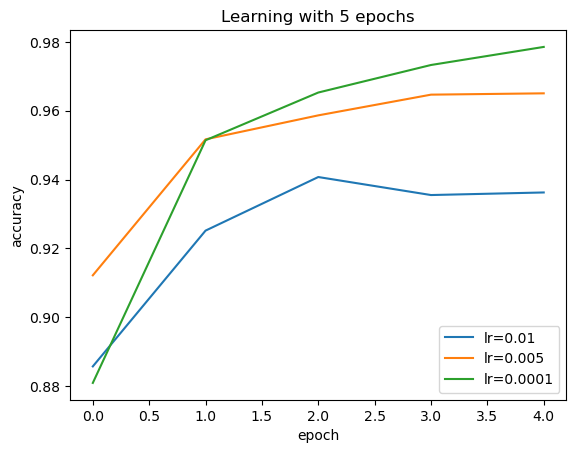

10 epochs with learning rate=0.01
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4599 - accuracy: 0.8834 - val_loss: 0.3095 - val_accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3247 - accuracy: 0.9230 - val_loss: 0.2762 - val_accuracy: 0.9395
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2842 - accuracy: 0.9340 - val_loss: 0.2734 - val_accuracy: 0.9311
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2842 - accuracy: 0.9366 - val_loss: 0.2775 - val_accuracy: 0.9408
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2601 - accuracy: 0.9420 - val_loss: 0.2564 - val_accuracy: 0.9454
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2563 - accuracy: 0.9424 - val_loss: 3.8543 - val_accuracy: 0.8136
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3251 - accuracy: 0.

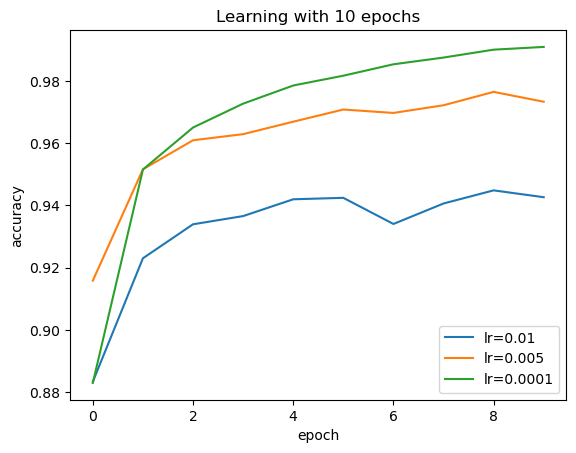

20 epochs with learning rate=0.01
Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4447 - accuracy: 0.8845 - val_loss: 0.3648 - val_accuracy: 0.9146
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3158 - accuracy: 0.9260 - val_loss: 0.2938 - val_accuracy: 0.9360
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2709 - accuracy: 0.9360 - val_loss: 0.2850 - val_accuracy: 0.9436
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3104 - accuracy: 0.9317 - val_loss: 0.2560 - val_accuracy: 0.9432
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2491 - accuracy: 0.9439 - val_loss: 0.2857 - val_accuracy: 0.9378
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2659 - accuracy: 0.9416 - val_loss: 0.2511 - val_accuracy: 0.9473
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2724 - accuracy: 0.94

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0828 - val_accuracy: 0.9803
Epoch 17/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.0951 - val_accuracy: 0.9771
Epoch 18/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.0828 - val_accuracy: 0.9793
Epoch 19/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0804 - val_accuracy: 0.9800
Epoch 20/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0850 - val_accuracy: 0.9796




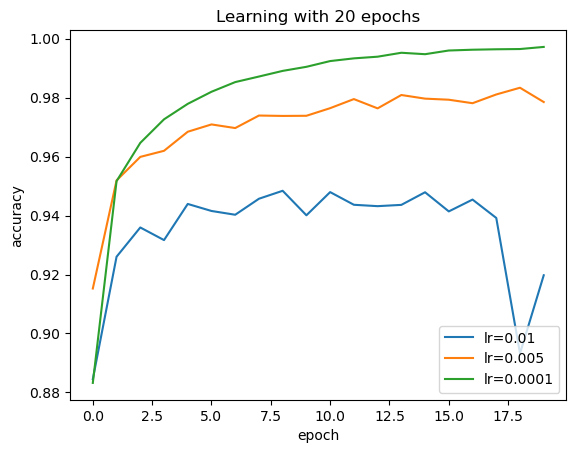

In [14]:
epoch_list = [3, 5, 10, 20]
learning_rates = [0.01, 0.005, 0.0001]
model_list2 = [0,0,0,0,0,0,0,0,0,0,0,0]
model_history2 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(4):
    for j in range(3):
        model_list2[j + i*3] = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10),
        ])
        model_list2[j + i*3].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rates[j]), loss=loss_fn, metrics=['accuracy'])
        print(str(epoch_list[i]) + ' epochs' + ' with learning rate=' + str(learning_rates[j]))
        model_history2[j + i*3] = model_list2[j + i*3].fit(
        x_train,
        y_train,
        epochs=epoch_list[i],
        batch_size=32,
        validation_data=(x_test, y_test),
        callbacks=[tensorboard_callback])
        print('\n')
    plt.plot(model_history2[0+i*3].history['accuracy'])
    plt.plot(model_history2[1+i*3].history['accuracy'])
    plt.plot(model_history2[2+i*3].history['accuracy'])

    plt.title('Learning with ' + str(epoch_list[i]) + ' epochs')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['lr=0.01', 'lr=0.005', 'lr=0.0001'], loc='lower right')
    plt.show()

In [15]:
#Saving the weights of the previously trained models
for i in range(12):
    safe_name = 'model' + str(i+5)
    model_list2[i].save(safe_name, save_format='h5')

The highest accuracy that's been reached was achieved by the model with 20 epochs and a learning rate of 0.0001 (training accuracy of 99.72% and validation accuracy of 97.96%). Generally speaking you could say,that the lowest learning rate results in the highest accuracy after a lot training in later epochs, even though it starts with the lowest accuracy of all models. The higher learning rate of 0.01 results in higher oscillations and a low accuracy after going through multiple epochs (noticeable change after three epochs). The learning rate of 0.005 starts with the highest accuracy but can't reach the accuracy of the model with the 0.0001 learning rate.
***
My conclusion from this is, that the learning rate of 0.0001 is more desireable than the higher learning rates, as it reaches the highest maximal accuracy of all tested models. If you do not have the time or resources to train the model for more than one epoch, you can use the 0.005 learning rate, as it's accuracy is the highest from the very beginning to the end of the first epoch.

We will now test the model with 20 epochs and a learning rate of 0.0001 on wether the high accuracy is truly capable of recognizing the test data from the MNIST dataset, or if the high accuracy is due to overfitting the model with the training and validation data.
<br>
If the dropout layer works like it is intended to do, the evaluation of the model should result in a similar accuracy:

In [16]:
batch_size=64
model16 = tf.keras.models.load_model('model16')
loss16, acc16 = model16.evaluate(x_test, y_test, batch_size=batch_size)

print("\n model16 accuracy: %.1f%%" % (100.0 * acc16))

157/157 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9796

 model16 accuracy: 98.0%


With this it is confirmed, that the model actually reaches an accuracy close to 98%, which is a very good value.

Now that we have a model that is guaranteed to deliver a good performance, I'd like to test the it with a few modifications, done to the dataset. 
<br>
Therefore the number 'one' is removed from the dataset. The model will then be trained with the modified dataset and tested with the normal dataset. 
<br> As the number 'seven' looks most similar, I expect the model to predict all pictures of 'ones' as 'sevens':

Epoch 1/20
1665/1665 [==============================] - 37s 19ms/step - loss: 2.4329 - accuracy: 0.7730 - val_loss: 2.6979 - val_accuracy: 0.8012
Epoch 2/20
1665/1665 [==============================] - 33s 20ms/step - loss: 0.5163 - accuracy: 0.8872 - val_loss: 2.3397 - val_accuracy: 0.8251
Epoch 3/20
1665/1665 [==============================] - 30s 18ms/step - loss: 0.3158 - accuracy: 0.9194 - val_loss: 2.1758 - val_accuracy: 0.8349
Epoch 4/20
1665/1665 [==============================] - 37s 22ms/step - loss: 0.2190 - accuracy: 0.9389 - val_loss: 1.9688 - val_accuracy: 0.8416
Epoch 5/20
1665/1665 [==============================] - 34s 20ms/step - loss: 0.1705 - accuracy: 0.9498 - val_loss: 2.1331 - val_accuracy: 0.8469
Epoch 6/20
1665/1665 [==============================] - 30s 18ms/step - loss: 0.1332 - accuracy: 0.9605 - val_loss: 2.0774 - val_accuracy: 0.8514
Epoch 7/20
1665/1665 [==============================] - 46s 27ms/step - loss: 0.1064 - accuracy: 0.9673 - val_loss: 2.1980 -

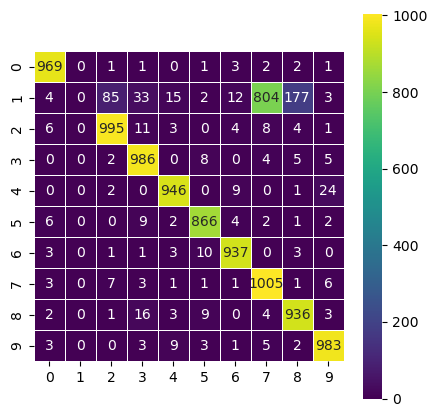

157/157 [==============================] - 3s 11ms/step - loss: 18.4279 - accuracy: 0.9796

 model17 accuracy: 98.0%


In [28]:
#Defining a function that allows us to create a modified dataset
def remove(digit, x, y):
    idx = (y != digit).nonzero()
    return x[idx], y[idx]

#preparing the new dataset
x_train_no1, y_train_no1 = remove(1, x_train, y_train)

#New model that is to be trained without ones
model17 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10),
])

#Compiling the model with a learning rate of 0.0001
model17.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=loss_fn, metrics=['accuracy'])

#Training the model with 20 epochs
model17_history = model17.fit(
x_train_no1,
y_train_no1,
epochs=20,
batch_size=32,
validation_data=(x_test, y_test),
callbacks=[tensorboard_callback])

#Printing the heatmap for better visualisation
predictions_17 = model17.predict([x_test])
predictions_17 = np.argmax(predictions_17, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_test, predictions_17)

f, ax = plt.subplots(figsize=(5, 5))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
print('model heatmap without being trained on ones:')
plt.show()
    
#Evaluating the dataset with the normal test data, containing ones as usual
batch_size=64
model17 = tf.keras.models.load_model('model16')
loss17, acc17 = model17.evaluate(x_test, y_test, batch_size=batch_size)
print("\n model17 accuracy: %.1f%%" % (100.0 * acc17))

As expected, the ones are predicted as mostly sevens and surprisingly with not much less propability as eights. We can now print the numbers in order to better understand the similarity between ones and eights, that the neural network recognized:

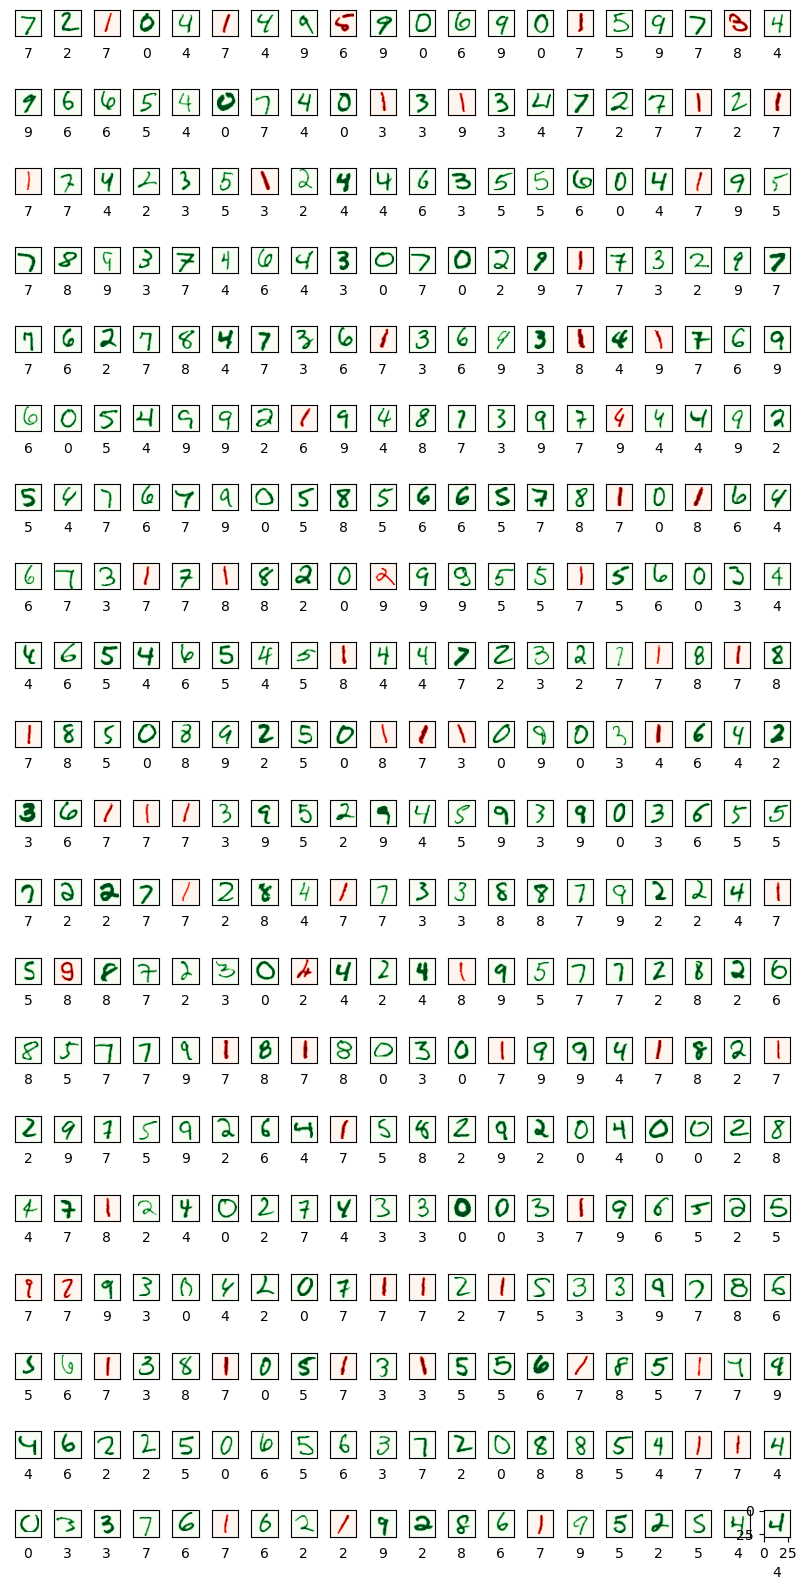

In [29]:
numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 20))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_17[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

It is noticable, that most ones are mistaken as either sevens or eights. I can't see any similarities between the eights that have been guessed correctly and the ones that have been mistaken as eights. With a lot of imagination you could argue that a very slim eight has the same outline as a one, but as I said, I'll leave that to your imagination, as further explanation would require a lot of deep analysis.